<a href="https://colab.research.google.com/github/daniil-koblov/py_sem/blob/main/py_sem_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df = pd.read_csv('sample_data/california_housing_train.csv')

In [11]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


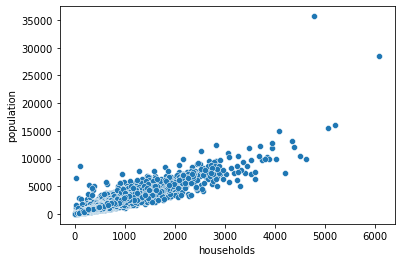

In [ ]:
sns.scatterplot(data=df, x="households", y="population")
# sns.scatterplot(data=df, x = df.query('households <= 5500')['households'], y = df.query('population <= 30000')['population'])

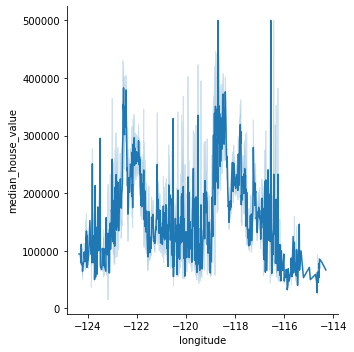

In [ ]:
sns.relplot(x = df.longitude, y = df.median_house_value, kind = 'line')

<AxesSubplot:xlabel='housing_median_age', ylabel='Count'>

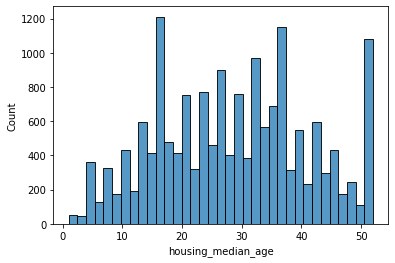

In [12]:
sns.histplot(x = df.housing_median_age)
# sns.histplot(x = df.query('housing_median_age >= 50')['housing_median_age'])
# sns.histplot(x = df.query('housing_median_age >= 20 and housing_median_age <= 30')['housing_median_age'])
# sns.histplot(x = df.query('housing_median_age > 40 and housing_median_age < 50')['housing_median_age'])

<AxesSubplot:xlabel='age', ylabel='Count'>

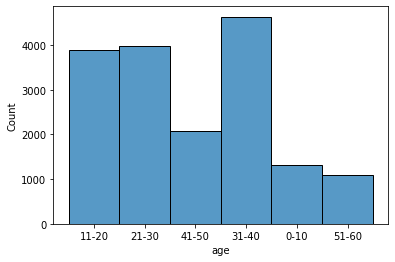

In [22]:
def age(x):
  if x <= 10:
    return '0-10'
  elif x > 10 and x <= 20:
    return '11-20'
  elif x > 20 and x <= 30:
    return '21-30'
  elif x > 30 and x <= 40:
    return '31-40'
  elif x > 40 and x <= 50:
    return '41-50'
  elif x > 50 and x <= 60:
    return '51-60'
df['age'] = df.housing_median_age.apply(age)
sns.histplot(x = df.age)

<Figure size 720x4320 with 0 Axes>

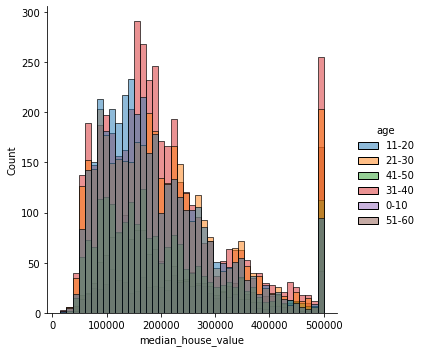

In [ ]:
def age(x):
  if x<=10:
    return "0-10"
  elif 10<x<=20:
    return "11-20"
  elif 20<x<=30:
    return "21-30"
  elif 30<x<=40:
    return "31-40"
  elif 40<x<=50:
    return "41-50"
  elif 50<x<=60:
    return "51-60"
  elif 60<x<=70:
    return "61-70"
  elif 70<x<=80:
    return "71-80"
  elif 80<x<=90:
    return "81-90"
df['age'] = df.housing_median_age.apply(age)
plt.figure(figsize=(10, 60))
sns.displot(data=df, x="median_house_value", hue="age")

In [ ]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


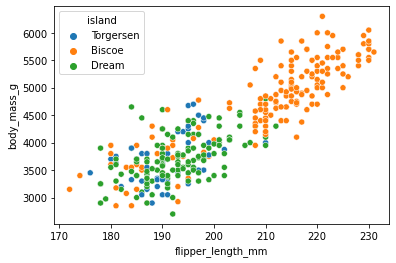

In [ ]:
sns.scatterplot(x = penguins.flipper_length_mm, y = penguins.body_mass_g, hue = penguins.island)

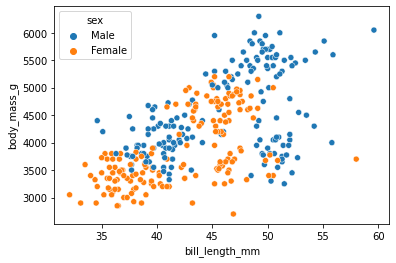

In [ ]:
sns.scatterplot(x = penguins.bill_length_mm, y = penguins.body_mass_g, hue = penguins.sex)
# sns.scatterplot(x = penguins.bill_length_mm, y= penguins.bill_depth_mm, hue = penguins.sex)

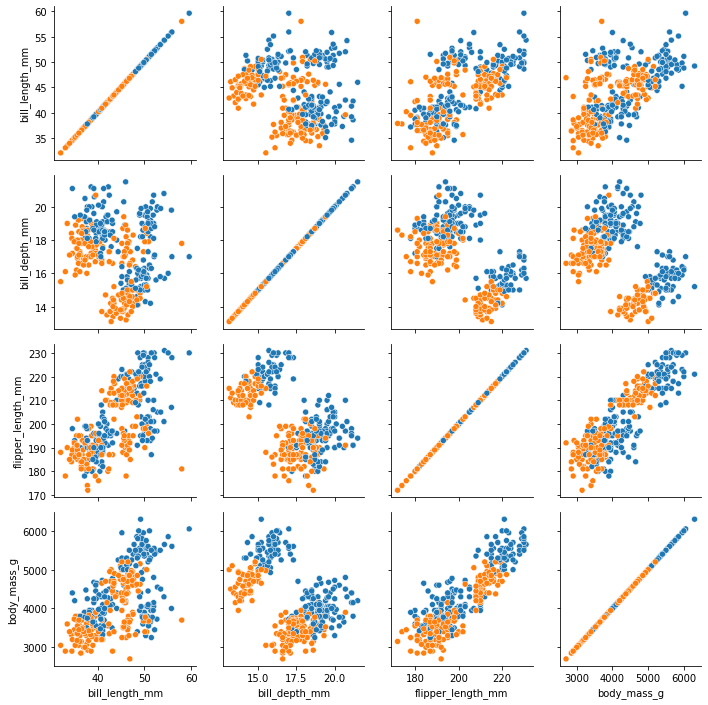

In [ ]:
cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
'body_mass_g', 'sex']
g = sns.PairGrid(penguins[cols], hue = 'sex')
g.map(sns.scatterplot)


In [ ]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [ ]:
# Создать новый столбец в таблице с
# пингвинами, который будет отвечать за
# показатель длины клюва пингвина.
# high - длинный(от 42)
# middle - средний(от 35 до 42)
# low - маленький(до 35)
def length(x):
  if x >= 42:
    return "high"
  elif 35<=x<42:
    return "middle"
  elif x<35:
    return "low"
penguins['length'] = penguins.bill_length_mm.apply(length)

In [ ]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,length
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,middle
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,middle
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,middle
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,None
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,middle
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,None
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,high
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,high
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,high


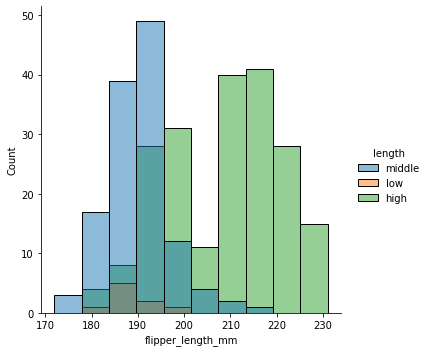

In [ ]:
sns.displot(x=penguins.flipper_length_mm, hue=penguins.length)